## How to plot a map using cartopy 

Cartopy is a mapping and imaging package originating from the Met. Office in the UK. The home page for the package is http://scitools.org.uk/cartopy/. Like many python packages, the [documentation](http://scitools.org.uk/cartopy/docs/latest/index.html) is patchy and the best way to learn is to try to do things and ask other people who have figured out this and that. 

We are going to work through a number of the examples and try to extend them to do the kinds of things you might find interesting and useful in the future. The examples are in the form of a [gallery](http://scitools.org.uk/cartopy/docs/latest/gallery.html)

You might also want to look at the [list of map projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) from time to time. Not all maps can be plotted in every projection (sometimes because of bugs and sometimes because they are not supposed to work for the data you have) but you can try them and see what happens.

Cartopy is built on top of a lot of the matplotlib graphing tools. It works by introducing a series of projections associated with the axes of a graph. On top of that there is a big toolkit for reading in images, finding data from standard web feeds, and manipulating geographical objects. Many, many libraries are involved and sometimes things break. Luckily the installation that is built for this course is about as reliable as we can ever get. I'm just warning you, though, that it can be quite tough if you want to put this on your laptop from scratch.

---



In [18]:
# First we import the modules we need

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

# A general library for reading image files and converting to arrays etc
import imageio

# The universal solvent for arrays (and hence images).
import numpy as np

## Add a topography image to the map

The topography is a "data" image (an array of depths) not colours. So it needs a colourmap
to convert the depths / heights into colours.

Another choice for a background image would be `matplotlib.cm.gray`

Note, we also have to tell the `imshow` command what the **original** projection of the data looked like
(here we just tell it that the data are on an array of lon/lat ... aka `PlateCarree`)

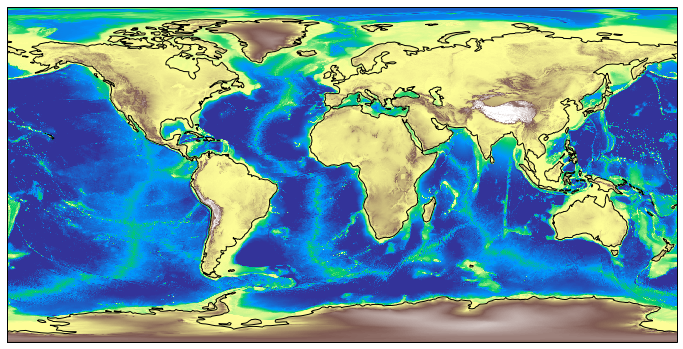

In [39]:

topography_imgfile = imageio.imread("../+Data/Etopo1_2400x1200.tif")


fig=plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.terrain, vmin=-5000, vmax=5000, 
          zorder=2)

ax.coastlines(zorder=3)

plt.show()
plt.close()


All the usual projections 'just work' but sometimes things can be a bit slow !

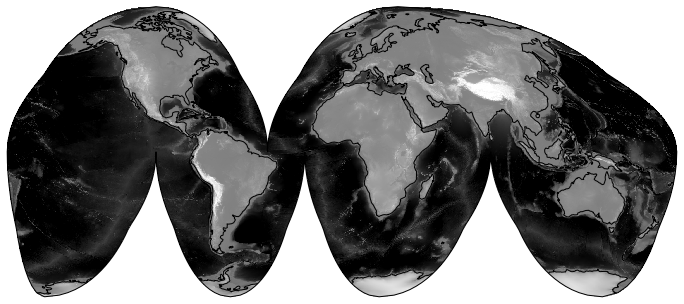

In [38]:
fig = plt.figure(figsize=(8, 8), facecolor="none")
ax  = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())


ax.set_global()

ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.gray, vmin=-5000, vmax=5000, 
          zorder=2)

ax.coastlines(zorder=3)


plt.show()
plt.close()

## Layering / blending images

Transparency in images (anything in matplotlib) works by setting an `alpha` value between 0 and 1



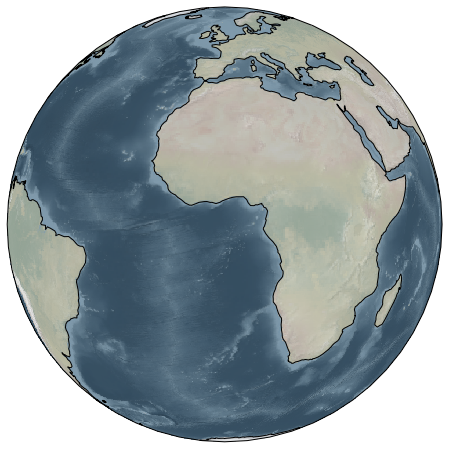

In [41]:

fig=plt.figure(figsize=(8, 8), facecolor="none")
ax = plt.axes(projection=ccrs.NearsidePerspective())

ax.stock_img()
ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.gray, vmin=-5000, vmax=5000, alpha=0.5,
          zorder=2)

ax.coastlines(zorder=3)

plt.show()
plt.close()

If you want to save the image, call `fig.savefig("filename.type")` before closing

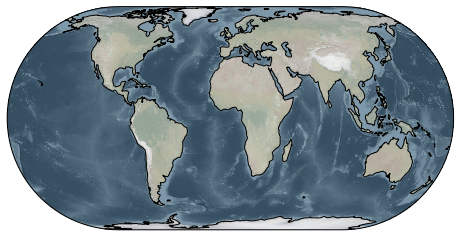

In [44]:
## For example:

fig=plt.figure(figsize=(8, 8), facecolor="none")
ax = plt.axes(projection=ccrs.EckertIV())

ax.stock_img()
ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.gray, vmin=-5000, vmax=5000, alpha=0.5,
          zorder=2)

ax.coastlines(zorder=3)
fig.savefig("TopographyPlusShading.png", dpi=300)

plt.show()
plt.close()



In [46]:
!ls -al

total 8576
drwxr-xr-x  8 lmoresi  staff      256  9 May 15:56 .
drwxr-xr-x  6 lmoresi  staff      192  9 May 15:05 ..
drwxr-xr-x  5 lmoresi  staff      160  9 May 15:57 .ipynb_checkpoints
-rw-r--r--@ 1 lmoresi  staff  1077184  9 May 15:56 0-How2PlotAMap.ipynb
-rw-r--r--  1 lmoresi  staff  1080156  9 May 15:31 1-How2PlotAnImageOnAMap.ipynb
-rw-r--r--@ 1 lmoresi  staff     3363  2 May 16:59 Exercise1.ipynb
-rw-r--r--@ 1 lmoresi  staff   125476  2 May 16:59 Exercise2.ipynb
-rw-r--r--  1 lmoresi  staff  1556124  9 May 15:57 TopographyPlusShading.png
